In [3]:
import pandas as pd
titanic = pd.read_excel('./titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [5]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  gender     1045 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 130.6+ KB


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = \
train_test_split(X_ss, y, test_size = 0.2, random_state = 13)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear')
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)


In [8]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

In [11]:
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Threshold : ', custom_threshold)
print('Accuracy : ', accuracy_score(y_test, custom_predict))
print('Precision : ', precision_score(y_test, custom_predict))
print('Recall : ', recall_score(y_test, custom_predict))

Threshold :  0.5
Accuracy :  0.7559808612440191
Precision :  0.7534246575342466
Recall :  0.625


In [13]:
custom_threshold = 0.3

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold : ', custom_threshold)
print('Accuracy : ', accuracy_score(y_test, custom_predict))
print('Precision : ', precision_score(y_test, custom_predict))
print('Recall : ', recall_score(y_test, custom_predict))

Threshold :  0.3
Accuracy :  0.7607655502392344
Precision :  0.6938775510204082
Recall :  0.7727272727272727


In [14]:
custom_threshold = 0.8

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold : ', custom_threshold)
print('Accuracy : ', accuracy_score(y_test, custom_predict))
print('Precision : ', precision_score(y_test, custom_predict))
print('Recall : ', recall_score(y_test, custom_predict))

Threshold :  0.8
Accuracy :  0.722488038277512
Precision :  0.9411764705882353
Recall :  0.36363636363636365


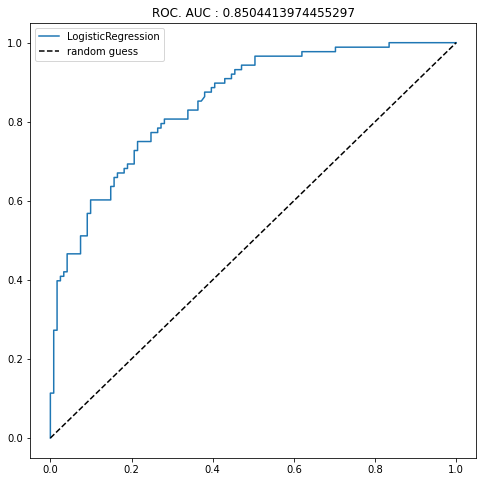

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba_1 = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_1)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label = 'LogisticRegression')
plt.plot([0, 1], [0, 1], 'k--', label = 'random guess')
plt.title("ROC. AUC : " + str(roc_auc_score(y_test, pred_proba_1)))
plt.legend()
plt.show()

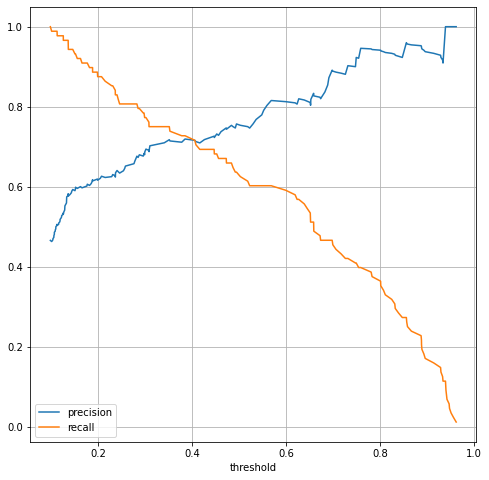

In [16]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize = (8, 8))
plt.plot(thresholds, precisions[:len(thresholds)], label = 'precision')
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recall')
plt.legend()
plt.grid()
plt.xlabel('threshold')
plt.show()